In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
% matplotlib inline

Generate test objective function for evaluating optimiser performance

In [2]:
def rosen(x, y, a = 1, b = 100):
    return (a - x)**2 + b*(y - x**2)**2

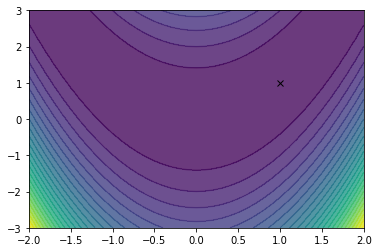

In [3]:
x = np.arange(-2, 2.1, 0.1)
y = np.arange(-3, 3.1, 0.1)
xx, yy = np.meshgrid(x, y)

objective_function = rosen(xx, yy)

plt.contour(xx, yy, objective_function, 30, alpha = 0.4)
plt.contourf(xx, yy, objective_function, 30, alpha = 0.8)
plt.plot(1, 1, 'x', color = 'k') # global minimum

Perform particle swarm optimisation

In [4]:
# initialisation
n_particles = 20
n_dimensions = 2

# initialise particle current position
pPos = np.random.uniform(-2.0, 2.0, (n_particles, n_dimensions))

# initialise particle best position
pBest = pPos.copy()

# initialise particle current velocity
pVel = np.random.uniform(-0.2, 0.2, (n_particles, n_dimensions))

# initialise swarm best position
g = pPos[0, :]

err = rosen(pPos[:, 0], pPos[:, 1])

if np.min(err) < rosen(g[0], g[1]):

    g = pPos[np.argmin(err), :]
    
print(g)
print(rosen(g[0], g[1]))

[-0.40381221  0.19449202]
2.06945887331


Visualise initial particle positions

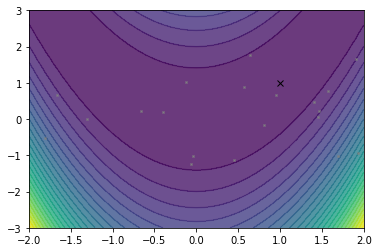

In [5]:
plt.contour(xx, yy, objective_function, 30, alpha = 0.4)
plt.contourf(xx, yy, objective_function, 30, alpha = 0.8)
plt.plot(1, 1, 'x', color = 'k') # global minimum

plt.plot(pPos[:, 0], pPos[:, 1], 'x', color = 'grey', markersize = 2)

In [6]:
# iterate particle swarm
n_iterations = 200

w            = 0.9
phi_p        = 0.3
phi_g        = 0.3

all_pPos = []
for it in range(n_iterations):
    
    pVel = (w*pVel 
         + phi_p*np.diag(np.random.rand(n_particles)).dot(pBest - pPos) 
         + phi_g*np.diag(np.random.rand(n_particles)).dot(g - pPos)
           )
    
    pPos += pVel
    
    err = rosen(pPos[:, 0], pPos[:, 1])
    errBest = rosen(pBest[:, 0], pBest[:, 1])
    
    pBest[err < errBest] = pPos[err < errBest]
    
    if np.min(errBest) < rosen(g[0], g[1]):
        g = pBest[np.argmin(errBest), :]
        
    all_pPos.append(pPos.copy())
                
print(g)
print(rosen(g[0], g[1]))

[ 0.96705767  0.93493376]
0.001092313911


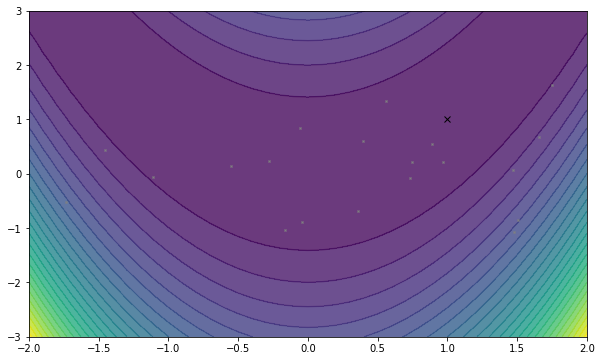

In [7]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.contour(xx, yy, objective_function, 30, alpha = 0.4)
ax.contourf(xx, yy, objective_function, 30, alpha = 0.8)
ax.plot(1, 1, 'x', color = 'k') # global minimum
particles, = ax.plot(all_pPos[0][:, 0], all_pPos[0][:, 1], 'x', color = 'grey', markersize = 2)
ax.set_xlim([-2, 2])
ax.set_ylim([-3, 3])
def animate(i):
    particles.set_data(all_pPos[i][:, 0], all_pPos[i][:, 1])
    
anim = FuncAnimation(fig, animate, interval = 100, frames = n_iterations)

In [444]:
HTML(anim.to_html5_video())